<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

*CSCI 3022 - Yoshie Bell-Souder*

   ## <b>Did Covid-19 really affect world happiness?</b>

## <b>Intoroduction</b>

COVID-19 was an unexpected situation all over the world. Every day we had heard sad news about health problems and about people dying. In addition, we were afraid of the seemingly endless suffering.  The first peak of cases came down slowly, although we would like to try to be over the pandemic life. I am wondering about how people's happiness was changed before and after pandemic. Will it be the same as before overall, or did people's thoughts change and their happiness will be affected? Because of this, I decided that the theme of my project for this class would be world happiness and COVID-19.

The World Happiness Report has been released by the United Nation Sustainable Development Solutions Network every year since 2012 (Helliwell et al, 2022). The UNSDSN calculated a happiness score for each country using survey data from around the world.  They also compare the hapiness score of many countries using lots of different data, such as GDP, income, healthy life expectancy and the opinions of residents and so on. Contries were ranked by the hapiness scores.  The survey also rated the following on a scale of 1-10, with 1 being the lowest and 10 being the highest: how people feel about freedom of choice in their country; how much social support they have; and how generous they are. In adition, I would like to use COVID-19 case numbers and deaths for each country to compare hapiness scores.

This data has many variables, but I will first work on a linear regression model to model the change in world hapiness scores from 2019 to 2021 regressed on the COVID-19 data.  I will also attempt to use the other 2019 variables, such as GDP, to control for their effect.  My goal is to inform what is important for our happiness using the trend of happiness before and after the pandemic.

In searching for this data online, there are so many world happiness comprison by year, disussions and analyses. The differnt part in my project is including the COVID-19 data.  I will focus specifically on data from 2019 and 2021 to compare people's situation in the world when people had similar sad situations and living remote lives.

## <b>Data collection, processing and cleanup</b>

Steps:
I examined a couple of different versions of the same year and I noticed the format of the data changes slightly every year. Therefore I cleaned up the data to focus on 8 different variables for each country from both years. These items are the happiness score, happiness ranking, GDP, social support, health and life expectancy, freedom of choice, generosity, and perceptions of corruption.  To enable comparisons by country, I cleaned up the data to only include countries that had data for both years.  Original dataset has 157 countries, but 138 countries has full data for every dataset I use. In more detail,

The data originally comes from: https://worldhappiness.report/

Because I needed a couple of different datasets from the Kaggle dataset. I will use the Kaggle dataset for this project:

- 2019: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv
- 2021: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
- Covid Dataset: 
https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=country_wise_latest.csv

The second step is to match the header column names and the same ordering. We do need to be aware of null values, but these datasets did not have null data.  So we just match the data that is actually present, in order to do the comparison.  Then merge the COVID-19 data.

The third step is how to measure/conclude the data. I will plan to use multiple-linear regression against the happiness score.<br>

1. Change in Happiness score: The difference (subtract) between 2019 and 2021. For example, Happiness ranking #1 country was Finland. Their score was 7.769 in 2019, and 7.842 in 2021. I use those data as 0.073 (7.842 - 7.769).  According to the World happiness report website, 2019 scores came from the average from 2005 to 2018.  2021 scores came from the average from 2005 to 2020. 
<br> There are only 2 years of additional data so it may not be much dramatically different score. <br>It may be hard to lead the summary, because it may not be significant points or reason. However, I will try to conclude based on my collection of datasets.<br>

2. Covid Case/death per capita: <br>
This dataset is based on WHO, the world health organization.  The Weekly Epidemiological Update provides an overview of the global, regional, and country-level COVID-19 cases and deaths, and is put together in 2020 Jan 20.

3. Six features from 
- Gross domestic product (GDP) per capita: The measurement is by the World Bank of the growth rate in GDP from the previous year. Unit is (%).  The GDP is an indicator of the country’s economy. 
- Social support:  In the country how much does the individual is available to have support. Basically, this is whether relatives or friends or people you can count on when you are in trouble or not. The measurement by the world happiness report comes from questionnaires.
- Healthy life expectancy. how long on average in the country do people live. The dataset is by the Ministry of Health Department(WHO).
- Freedom to make life choices. Individuals can choose from more than two selections by themselves. The data is from the world happiness report and comes from questionnaires.  This is whether you satisfied with the freedom of choice in what you do in your life or not.
- Generosity. the sacrifice of the giver, as a proportion of the financial resources of the person giving. The measurement by the world happiness report comes from questionnaires. This is whether you donated to a charity in the past month or not.
- Perceptions of corruption: how corrupt are civil servants and politicians perceived to be. The dataset is by Transparency International.

In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
whr19 = pd.read_csv('world-happiness-report-2019.csv')
whr21 = pd.read_csv('world-happiness-report-2021.csv')

import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [58]:
whr19 = whr19[['Country_2019', 'Rank_2019', 'Score_2019', 'GDP_2019', 'SocialSupport_2019', 
               'Life_expectancy_2019', 
               'Freedom_2019', 'Generosity_2019', 'PerceptionsCorruption_2019']]
whr19.sort_values(by='Rank_2019', ascending=True, na_position='first')

,Country_2019,Rank_2019,Score_2019,GDP_2019,SocialSupport_2019,Life_expectancy_2019,Freedom_2019,Generosity_2019,PerceptionsCorruption_2019
37,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
30,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
94,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
50,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
88,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
74,Malawi,144,3.410,0.191,0.560,0.495,0.443,0.218,0.089
134,Yemen,145,3.380,0.287,1.163,0.463,0.143,0.108,0.077
104,Rwanda,146,3.334,0.359,0.711,0.614,0.555,0.217,0.411
120,Tanzania,147,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [59]:
whr21 = whr21[['Country_2021', 'Rank_2021', 'Score_2021', 'GDP_2021', 'SocialSupport_2021',
               'Life_expectancy_2021', 'Freedom_2021', 'Generosity_2021',
               'PerceptionsCorruption_2021']]
whr21.sort_values(by='Rank_2021', ascending=True, na_position='first')

,Country_2021,Rank_2021,Score_2021,GDP_2021,SocialSupport_2021,Life_expectancy_2021,Freedom_2021,Generosity_2021,PerceptionsCorruption_2021
37,Finland,1,7.842,1.446,1.106,0.741,0.949,-0.098,0.186
30,Denmark,2,7.620,1.502,1.108,0.763,0.946,0.030,0.179
117,Switzerland,3,7.571,1.566,1.079,0.816,0.919,0.025,0.292
50,Iceland,4,7.554,1.482,1.172,0.772,0.955,0.160,0.673
88,Netherlands,5,7.464,1.501,1.079,0.753,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
68,Lesotho,144,3.512,0.451,0.731,0.007,0.715,-0.131,0.915
15,Botswana,145,3.467,1.099,0.724,0.340,0.824,-0.246,0.801
104,Rwanda,146,3.415,0.364,0.202,0.407,0.897,0.061,0.167
136,Zimbabwe,147,3.145,0.457,0.649,0.243,0.677,-0.047,0.821


<font size="4"><b>To do the EDA, we will examine the distribution of relavent variables.</b></font>

<font size="4"><b>The happiness score looks like it might be normally distributed. However, most other variables are not normally distributed. GDP, for example, is positively skewed. However, after discussion with Professor Kim, it was decided we don't worry too much the skewed data.</b></font>

Text(0.5, 0, 'PerceptionsCorruption 2019')

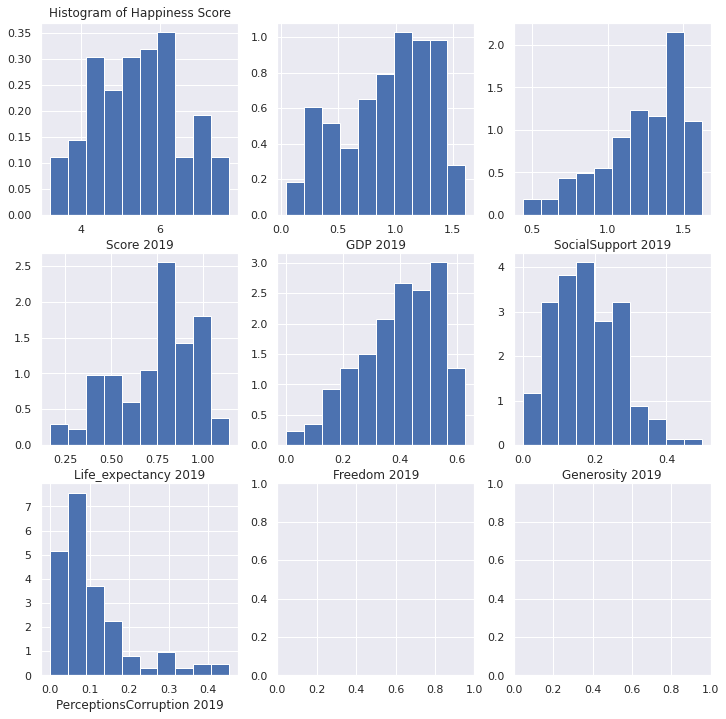

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=False, figsize=(12,12))

# matplotlib histogram
axes[0,0].hist(whr19['Score_2019'], density=True, bins = 10)
axes[0,1].hist(whr19['GDP_2019'], density=True, bins = 10)
axes[0,2].hist(whr19['SocialSupport_2019'], density=True, bins = 10)
axes[1,0].hist(whr19['Life_expectancy_2019'], density=True, bins = 10)
axes[1,1].hist(whr19['Freedom_2019'], density=True, bins = 10)
axes[1,2].hist(whr19['Generosity_2019'], density=True, bins = 10)
axes[2,0].hist(whr19['PerceptionsCorruption_2019'], density=True, bins = 10)

# Add labels
axes[0,0].set_title('Histogram of Happiness Score')
axes[0,0].set_xlabel('Score 2019')
axes[0,1].set_xlabel('GDP 2019')
axes[0,2].set_xlabel('SocialSupport 2019')
axes[1,0].set_xlabel('Life_expectancy 2019')
axes[1,1].set_xlabel('Freedom 2019')
axes[1,2].set_xlabel('Generosity 2019')
axes[2,0].set_xlabel('PerceptionsCorruption 2019')

<font size="4"><b>Original Covid case and death dataset I found the unit was the number count of case or death. For example, the US case number is extremely large, but Afghanistan was extremely small. I needed to adjust to account for the differences between countries in this regard.  I did this by calculating per capita using the 2021 total country population.</b></font>

In [61]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')
# covid19 = covid19[['Country/Region', 'Confirmed_per_1k', 'Deaths_per_10k', ]]
covid19.head()

,Country/Region,compared population,Population,Confirmed,Confirmed_per_capita,Confirmed_per_1k,Deaths,Deaths_per_capita,Deaths_per_10k,Recovered,...,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,Afghanistan,40374668,36263,0.000898,0.898162,1269,0.000031,0.314,25198,...,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,Albania,2869700,4880,0.001701,1.700526,144,0.000050,0.502,2745,...,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,Algeria,45061896,27973,0.000621,0.620768,1163,0.000026,0.258,18837,...,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Argentina,Argentina,45847428,167416,0.003652,3.651590,3059,0.000067,0.667,72575,...,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
4,Armenia,Armenia,2970929,37390,0.012585,12.585289,711,0.000239,2.390,26665,...,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe


<font size="4"><b>The Covid-19 case data looks exponentially distibuted. </b></font>

Text(0.5, 0, 'Deaths')

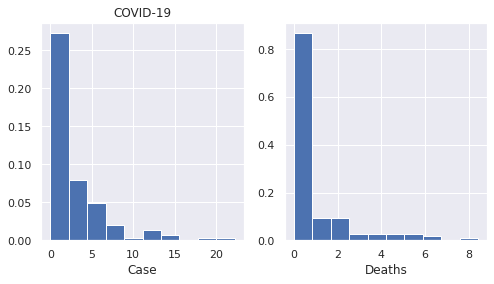

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(8,4))

# matplotlib histogram
axes[0].hist(covid19['Confirmed_per_1k'], density=True, bins = 10)
axes[1].hist(covid19['Deaths_per_10k'], density=True, bins = 10)


# Add labels
axes[0].set_title('COVID-19')
axes[0].set_xlabel('Case')
axes[1].set_xlabel('Deaths')

## <b>Planned Models <b>

My hypothesis is that Covid-19 affected happiness scores. 

(formula='Happiness score ~ Covid-19 case')  <be>
    
$\beta_1 =$ coefficient for Covid-19 cases

H0: $\beta_1=0$
    
H1: $\beta_1\ne0$
    
I will run the following modeling tests. (Full F-test)
    
(formula='Happiness score ~ Covid case')  <br>
(formula='Happiness score ~ Covid death') <br>
(formula='Happiness score ~ Covid case + Covid death') 


## Regression Model

<font size="4" ><b>Compute the difference (subtract) between 2019 and 2021 from two diferent csv files.</b></font>

In [36]:
result = pd.concat([whr19, whr21], axis=1)
result['Difference_HappinessScore'] = result.apply(lambda row: row.Score_2021 - 
                                  (row.Score_2019), axis = 1)
result = result[['Country_2021', 'Score_2019', 'Score_2021', 'Difference_HappinessScore',
                 ]]
result.sort_values(by='Score_2021', ascending=False, na_position='first')

,Country_2021,Score_2019,Score_2021,Difference_HappinessScore
37,Finland,7.769,7.842,0.073
30,Denmark,7.600,7.620,0.020
117,Switzerland,7.480,7.571,0.091
50,Iceland,7.494,7.554,0.060
88,Netherlands,7.488,7.464,-0.024
...,...,...,...,...
68,Lesotho,3.802,3.512,-0.290
15,Botswana,3.488,3.467,-0.021
104,Rwanda,3.334,3.415,0.081
136,Zimbabwe,3.663,3.145,-0.518


<font size="4" ><b>Merge the Covid-19 case and Detah data from another Covid-19 csv dataset.</b></font>

In [37]:
model = pd.concat([result, covid19], axis=1)
model = model[['Country_2021', 'Score_2019', 'Score_2021', 'Difference_HappinessScore', 
               'Confirmed_per_capita', 'Confirmed_per_1k', 'Deaths_per_capita', 'Deaths_per_10k']]
model.sort_values(by='Score_2021', ascending=False, na_position='first')

,Country_2021,Score_2019,Score_2021,Difference_HappinessScore,Confirmed_per_capita,Confirmed_per_1k,Deaths_per_capita,Deaths_per_10k
37,Finland,7.769,7.842,0.073,0.001332,1.332228,5.920000e-05,0.59200
30,Denmark,7.600,7.620,0.020,0.002362,2.362080,1.052220e-04,1.05000
117,Switzerland,7.480,7.571,0.091,0.003939,3.939074,2.259910e-04,2.26000
50,Iceland,7.494,7.554,0.060,0.005379,5.379433,2.900000e-05,0.29000
88,Netherlands,7.488,7.464,-0.024,0.003106,3.106256,3.582370e-04,3.58000
...,...,...,...,...,...,...,...,...
68,Lesotho,3.802,3.512,-0.290,0.000233,0.232804,5.530000e-06,0.05530
15,Botswana,3.488,3.467,-0.021,0.000305,0.304926,8.250000e-07,0.00825
104,Rwanda,3.334,3.415,0.081,0.000140,0.139535,3.710000e-07,0.00371
136,Zimbabwe,3.663,3.145,-0.518,0.000178,0.177546,2.360000e-06,0.02360


In [38]:
result = pd.concat([whr19, whr21], axis=1)
result['Difference_HappinessScore'] = result.apply(lambda row: row.Score_2021 - 
                                  (row.Score_2019), axis = 1)
allmodel = pd.concat([result, covid19], axis=1)
allmodel = allmodel[['Country_2021', 'Score_2019', 'Score_2021', 'Difference_HappinessScore', 
               'Confirmed_per_1k', 'Deaths_per_10k', 'GDP_2019', 'GDP_2021', 'SocialSupport_2019', 'SocialSupport_2021',
               'Life_expectancy_2019', 'Life_expectancy_2021', 'Freedom_2021', 'Generosity_2021',
               'PerceptionsCorruption_2021']]
# allmodel.sort_values(by='Score_2021', ascending=False, na_position='first')

<font size="4" ><b>First let's compare Happiness score against the Covid-19 cases.  As you may see on the scatter plot and p value, there is not relationship between the Happiness score and Covid-19 case. </b></font>

                                OLS Regression Results                               
Dep. Variable:     Difference_HappinessScore   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.007
Method:                        Least Squares   F-statistic:                   0.04169
Date:                       Tue, 03 May 2022   Prob (F-statistic):              0.839
Time:                               00:54:04   Log-Likelihood:                -19.694
No. Observations:                        137   AIC:                             43.39
Df Residuals:                            135   BIC:                             49.23
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

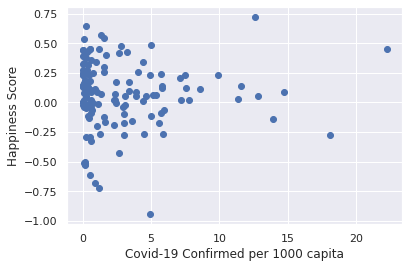

In [54]:
model_trn = smf.ols(formula='Difference_HappinessScore ~ Confirmed_per_1k', data=allmodel).fit()
print(model_trn.summary())

plt.plot(model.Confirmed_per_1k, model.Difference_HappinessScore, 'bo');
plt.xlabel('Covid-19 Confirmed per 1000 capita')
plt.ylabel('Happiness Score');

<font size="4" ><b>How about Covid-19 deaths? As you may see on the scatter plot and p value, there is also not significant correlation between Covid-19 death against the happiness score. </b></font>

                                OLS Regression Results                               
Dep. Variable:     Difference_HappinessScore   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                 -0.002
Method:                        Least Squares   F-statistic:                    0.7521
Date:                       Tue, 03 May 2022   Prob (F-statistic):              0.387
Time:                               00:54:10   Log-Likelihood:                -19.335
No. Observations:                        137   AIC:                             42.67
Df Residuals:                            135   BIC:                             48.51
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

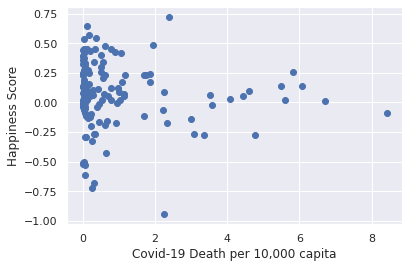

In [55]:
model_covid_deaths = smf.ols(formula='Difference_HappinessScore ~ Deaths_per_10k', data=allmodel).fit()
print(model_covid_deaths.summary())

plt.plot(model.Deaths_per_10k, model.Difference_HappinessScore, 'bo');
plt.xlabel('Covid-19 Death per 10,000 capita')
plt.ylabel('Happiness Score');

<font size="4" ><b>How about Covid case and death together? As you may see on the scatter plot and p value, there is also not significant correlation between Covid case and death together against the happiness score. </b></font><br>
(formula='Happines score ~ Covid case + Covid death')<br>

                                OLS Regression Results                               
Dep. Variable:     Difference_HappinessScore   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.7155
Date:                       Tue, 03 May 2022   Prob (F-statistic):              0.491
Time:                               01:06:18   Log-Likelihood:                -18.988
No. Observations:                        137   AIC:                             43.98
Df Residuals:                            134   BIC:                             52.74
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

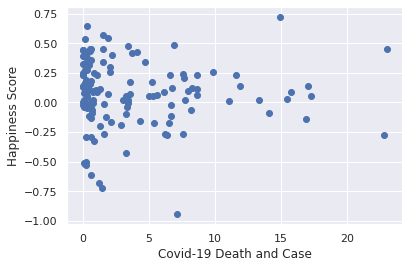

In [71]:
model_trn = smf.ols(formula='Difference_HappinessScore ~ Deaths_per_10k + Confirmed_per_1k', data=allmodel).fit()
print(model_trn.summary())

plt.plot(model.Deaths_per_10k + model.Confirmed_per_1k, model.Difference_HappinessScore, 'bo');
plt.xlabel('Covid-19 Death and Case')
plt.ylabel('Happiness Score');

<font size="4" ><b>Let's check the relationship between Covid-19 Case and Covid-19 Death </b></font><br/>
(formula='Covid case ~ Covid Death')<br>

<font size="4" ><b>Covid-19 cases and Covid-19 deaths are collinear. (𝑡135=7.767,  𝑝<0.001)</b></font><br>

<font size="4" ><b>So I will remove Covid-19 deaths from the model to meet the assumption of independence of predictors. The reason to remove the Covid-19 deaths instead of the cases would be because deaths may be impacted more complicated factors, such as age or prior health, but cases affect happiness directly for more people.</b></font>

                            OLS Regression Results                            
Dep. Variable:         Deaths_per_10k   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     60.32
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.81e-12
Time:                        01:14:06   Log-Likelihood:                -230.15
No. Observations:                 137   AIC:                             464.3
Df Residuals:                     135   BIC:                             470.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3016      0.137  

<AxesSubplot:xlabel='Covid-19 Death', ylabel='Covid-19 Case'>

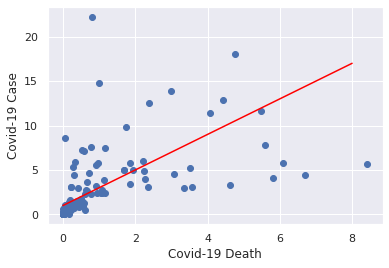

In [82]:
model_trn = smf.ols(formula='Deaths_per_10k ~ Confirmed_per_1k', data=allmodel).fit()
print(model_trn.summary())


plt.plot(model.Deaths_per_10k, model.Confirmed_per_1k, 'bo');
plt.xlabel('Covid-19 Death')
plt.ylabel('Covid-19 Case');

s = pd.Series([1, 3, 5,7, 9, 11,13, 15, 17])
s.plot.line(color={"red"})

<font size="4" ><b>In addition, I will test if Covid-19 cases had an effect on happiness scores when controling for effects of other variables that have previously shown to have an effect on happiness scores. 
(Partial F-test) </b></font><br>

(formula='Happines score ~ Covid case + GDP + Freedom ... + perceptions of curruption')<br>

In [49]:
model_trn = smf.ols(formula='Difference_HappinessScore ~ Confirmed_per_1k + GDP_2021 + SocialSupport_2021 + Life_expectancy_2021 + Freedom_2021 + Generosity_2021 + PerceptionsCorruption_2021', data=allmodel).fit()
print(model_trn.summary())

                                OLS Regression Results                               
Dep. Variable:     Difference_HappinessScore   R-squared:                       0.074
Model:                                   OLS   Adj. R-squared:                  0.024
Method:                        Least Squares   F-statistic:                     1.482
Date:                       Mon, 02 May 2022   Prob (F-statistic):              0.179
Time:                               23:01:38   Log-Likelihood:                -14.417
No. Observations:                        137   AIC:                             44.83
Df Residuals:                            129   BIC:                             68.19
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

## Conclusion

We checked Happiness related Covid-19 case, Death, both together, and Case and sub 6 features.  However, we cannot see the relationship between Happiness score and Covid-19 dataset.  Therefore, I would like to conclude even if we have Covid situation, people’s happiness won’t be affected very much. However, this maybe because of dataset limitation. This result is consistent other analysis that said Covid-19 has not affected average happiness.  


## Reference

Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World Happiness Report 2022. New York: Sustainable Development Solutions Network.